<a href="https://colab.research.google.com/github/hansomatig/handwriting-synthesis/blob/TFConV1toV2/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
! git clone https://github.com/hansomatig/handwriting-synthesis.git

Cloning into 'handwriting-synthesis'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 178 (delta 67), reused 134 (delta 52), pack-reused 0
Receiving objects: 100% (178/178), 43.30 MiB | 21.48 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [23]:
% cd handwriting-synthesis

/content/handwriting-synthesis/handwriting-synthesis


In [24]:
! git checkout TFConV1toV2

Branch 'TFConV1toV2' set up to track remote branch 'TFConV1toV2' from 'origin'.
Switched to a new branch 'TFConV1toV2'


In [25]:
! pip install svgwrite

In [27]:
%load_ext autoreload
%autoreload 2
from demo import Hand

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [30]:
import random
lines = ["    Nick Pawlowski"]
styles = [4]
biases = [2.4466002975385193]

hand = Hand()
hand.write(
    filename='img/usage_demo.svg',
    lines=lines,
    styles=styles,
    biases=biases
)

/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:901: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Restoring parameters from checkpoints/model-17900


Restoring parameters from checkpoints/model-17900
Restoring parameters from checkpoints/model-17900
Restoring parameters from checkpoints/model-17900
Restoring parameters from checkpoints/model-17900
Restoring parameters from checkpoints/model-17900
Restoring parameters from checkpoints/model-17900


In [32]:
!pip install cairosvg
import cairosvg
cairosvg.svg2png(url="/content/handwriting-synthesis/img/usage_demo.svg", write_to="/content/handwriting-synthesis/img/as_png.png")

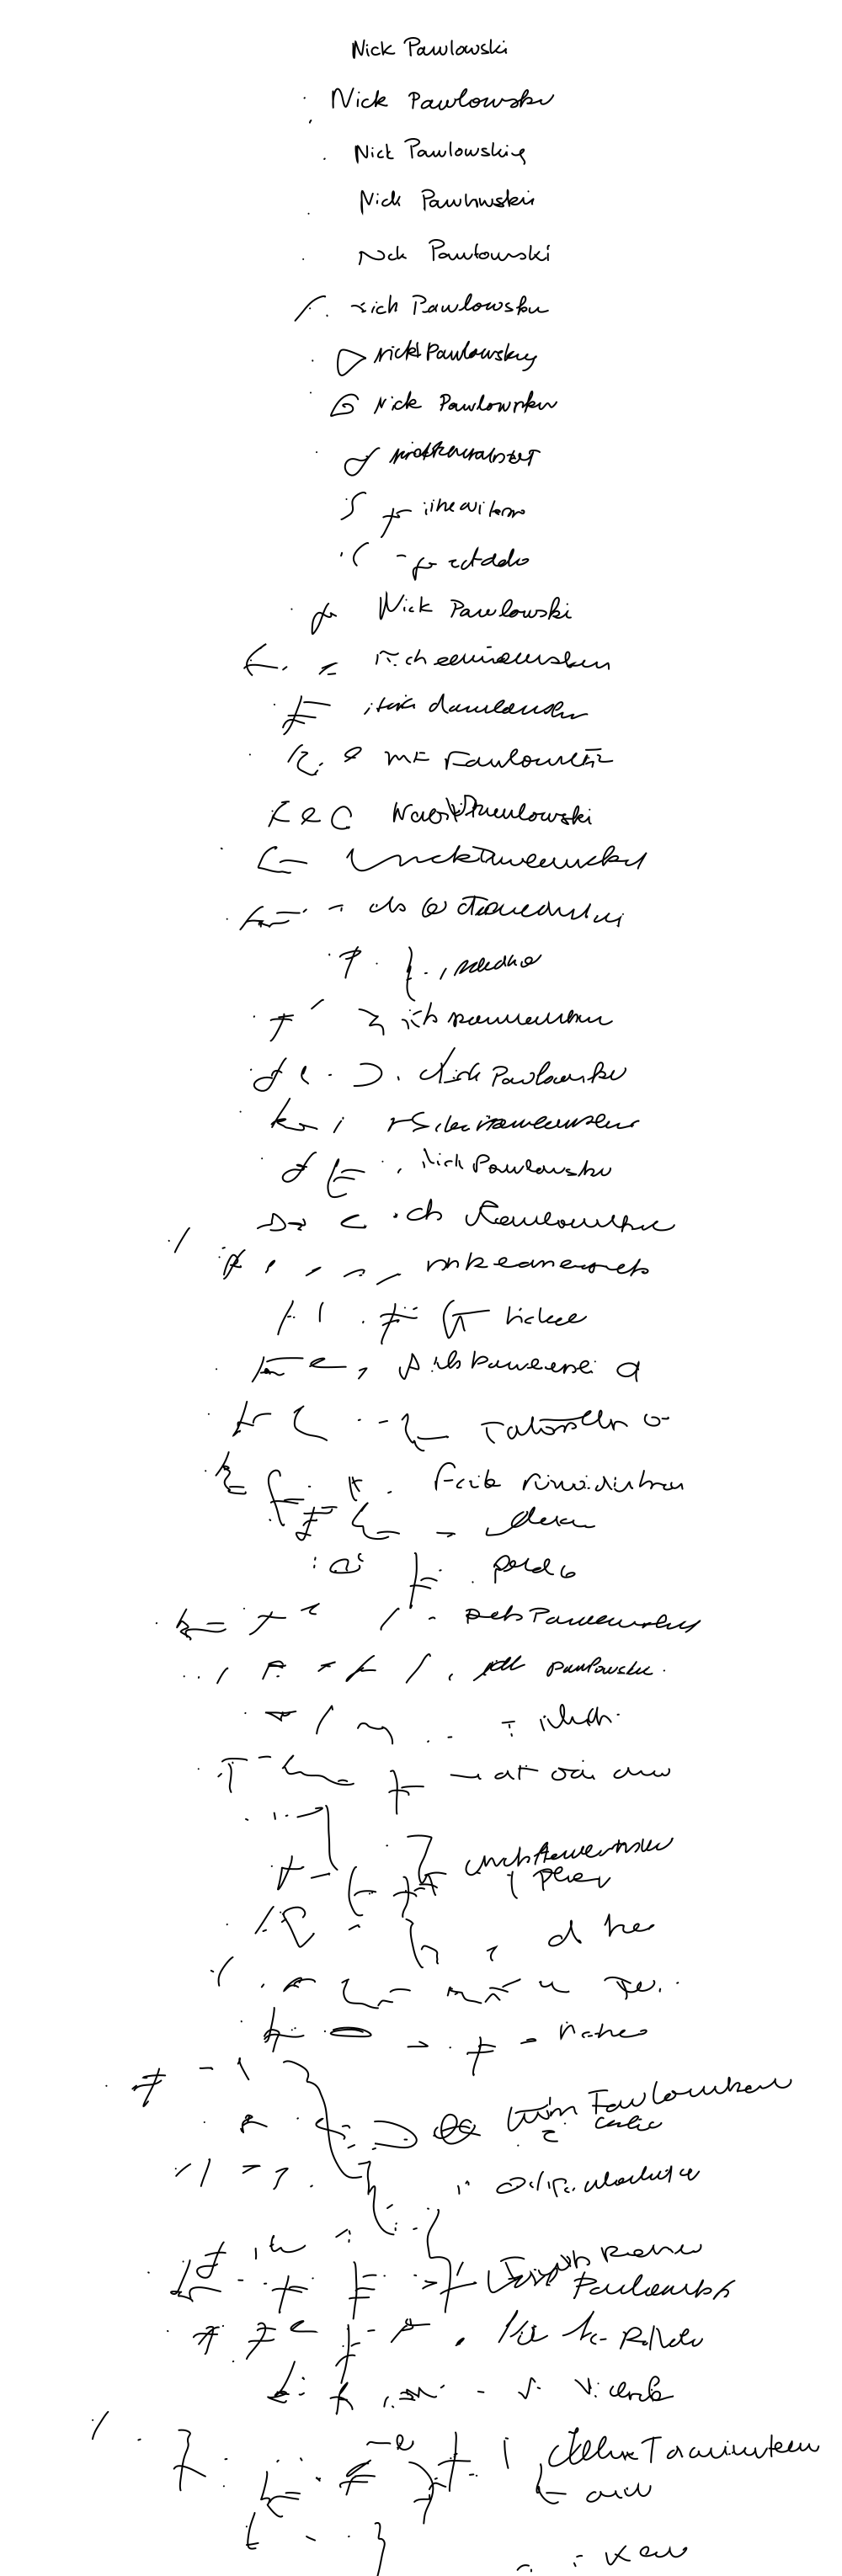

Instructions for updating:
Colocations handled automatically by placer.


From /usr/local/lib/python3.7/dist-packages/keras/layers/normalization/batch_normalization.py:520: _colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
From /usr/local/lib/python3.7/dist-packages/keras/layers/normalization/batch_normalization.py:520: _colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
From /usr/local/lib/python3.7/dist-packages/keras/layers/normalization/batch_normalization.py:520: _colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
From /usr/local/lib/python3.7/dist-packages/keras/layers/normalization/batch_normalization.py:520: _colocate_with (from tensorflow.python.framework.ops) is depr

No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
No training configuration found in the save file, so the model was *not* compiled. Compile it manually.


FileNotFoundError: ignored

In [33]:
from IPython.display import display, Image
display(Image(filename='/content/handwriting-synthesis/img/as_png.png'))

from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5')

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
image = Image.open('img/as_png.png')
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)